# Scenarios 

## Goals

Sizing the geometry of the beams to support different efforts: from the forces affecting to the arms during the take off to the impact forces during landing.

## Frame drawing

*Example of sketch of the structure of a multi-rotor drone with 4 arms*  
![4-arms drone structure](./img/FrameDesign.jpg)

The main drone structure is divided into 3 components:
- Arms. 
- Core frame.
- Landing gears. 

## Sizing scenarios

In the following diagram we have detailed below each component, the factor that affects the stresses of the structure. We have considered the two maximum scenarios: Both the engine thrust when taking off and the impact speed at which we land are the situations where the highest concentrations of stress will occur. 
In the last level of the scheme, we give the possible solutions: change the material, resize the structure or modify the number of landing gears or motors.


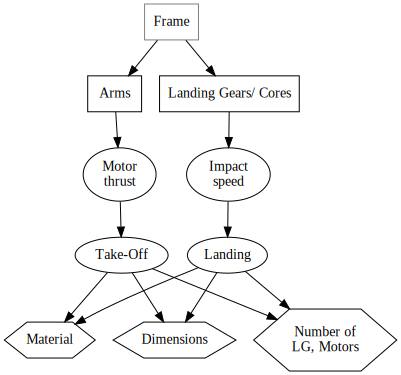

In [11]:
# Plot the WBS of the system
from graphviz import Digraph

dot = Digraph(comment='Frame system')
# System
dot.node('S', 'Frame', shape='rectangle', color='grey')

# Components
dot.node('C1', 'Arms', shape='rectangle')
dot.node('C2', 'Landing Gears/ Cores', shape='rectangle')

dot.edge('S','C1')
dot.edge('S','C2')


# Degradation factors

dot.node('D1', 'Motor\n thrust')
dot.edge('C1', 'D1')

dot.node('D2','Impact \n speed')
dot.edge('C2', 'D2')

# Scenarios

dot.node('E1', 'Take-Off ')
dot.edge('D1', 'E1')

dot.node('E2', 'Landing')
dot.edge('D2', 'E2')

# Measures

dot.node('F1', 'Material' , shape='hexagon')

dot.edge('E1', 'F1')
dot.edge('E2', 'F1')

dot.node('F2', 'Dimensions' , shape='hexagon')
dot.edge('E1', 'F2')
dot.edge('E2', 'F2')

dot.node('F3', 'Number of\n LG, Motors' , shape='hexagon')
dot.edge('E1', 'F3')
dot.edge('E2', 'F3')

dot

## Stress equations

Take-Off|Landing
- | - 
<img src="./img/SizingImpact2a.jpg" alt="Drawing"/>|<img src="./img/SizingImpact2b.jpg" alt="Drawing"/>


**Beam Sizing - Take Off**

$ \displaystyle M_{total}=\frac{F_{TO}}{N_{arms}}*coef*L_{arm}$ # [kg] Estimation of the moment applied to the support.

*coef is a security coefficient.

$ I_{square} = \displaystyle \frac{H^4}{12}$ [m^4] Moment of inertia for a square surface

$ I_{box} = \displaystyle I_{big}-I_{cavity}$ [m^4] Moment of inertia for a box 

$ \displaystyle  \sigma_{bc} = \frac{M_{total}}{I/(H/2)}$ [m^3] Maximum normal stress resisted in the extreme fiber.

To simplify the code and based on the importance of normal stress on the total stress, shear stresses will be omitted as it does not influence the total stress as much as the normal stress.

**Impact Force analysis**

At landing, the stress is distributed along the landing gear and the core frame. We break up the parts and analyze the distribution of forces individually. Cross section for the central core is a box whereas a rectangle is for the landing gear.

An impact force generates a moment on both the landing gear and the body core. We use the same equations.

The study of the impact force with which the drone lands on the ground can be considered by balancing potential ($E_p$) and kinetic energies($E_k$).
Mechanical energy is the sum of both energies which remains constant. At the moment just before the drone lands on the ground, the drone hits the ground with a velocity $v$. 
Its mechanical energy will be entirely kinetic energy, equivalent to : $E_k=\frac{1}{2}Mv^2$, where $M$ is the total system mass and $v$ is the velocity at which the drone hits the surface.
On impact, the kinetic energy is transformed into potential and the structure is deformed similar to how a spring is deformed by the application of a force. The mechanical energy will be entirely the potential energy, equivalent to $E_p=\frac{1}{2}Kx^2$, where $K$ is the elastic constant of the spring and $x$ is the deformation.

As the mechanical energy remains constant both quantities can be equaled:
$\displaystyle \frac{1}{2}Mv^2=\frac{1}{2}Kx^2$
If we apply Hooke's law ($F=Kx$) for springs to the above equation we get:
$\displaystyle\frac{1}{2}Mv^2=\frac{1}{2}\frac{F^2}{K}$

where $F$ is the impact force which contracts the system and can be also expressed as:
$\displaystyle F=v\sqrt{K M}(+M g)$

For the calculation of K we consider that the landing gear and the core form a system in series and this system will be multiplied by the number of landing gears that the drone has.

$\displaystyle K_{eq}=\frac{K_1 K_2}{K1+K2}Narms$

![4-arms drone structure](./img/ParallelSpring.jpg)

**How to calculate K1 and K2?**

K is the stiffness constant and represents the inverse of the displacement.
The displacement or deflection that one beam does under the action of a force with one end fixed can be calculated on the basis of the [Euler-Bernoulli beam equation](https://en.wikipedia.org/wiki/Deflection_(engineering)) and its equation is :


$\displaystyle x=\frac{FL^3}{3EI}$




For the calculation of every K, we break up the parts and calculate the displacement for every subsystem individually.

$\displaystyle K_i=\frac{1}{x_i}$ 

- $x_i$ is the deflection of every subsystem.
- $K_i$ is the stiffness constant of every subsystem.

For every subsystem we consider that one force F of value 1 N is acting at the end of the beam obtaining a displacement. In the subsystem 2, since the beam is inclined and the force is applied at the end of the beam perpendicularly to the ground, the force needs to be oriented by multiplying for sinus to calculate the deflection of the beam .